In [ ]:
import pandas as pd 
import sklearn as sk

In [2]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path):
    images = []
    labels = []
    
    # Loop through the folders inside the main directory
    for folder_name in os.listdir(folder_path):
        folder_dir = os.path.join(folder_path, folder_name)
        
        if not os.path.isdir(folder_dir):
            continue
        
        # Get the age label from the folder name
        age_label = int(folder_name)
        
        # Loop through the images inside the folder
        for filename in os.listdir(folder_dir):
            img_path = os.path.join(folder_dir, filename)
            
            # Read the image using OpenCV
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                # Resize the image to 200x200 pixels
                img = cv2.resize(img, (200, 200))
                
                # Append the image and corresponding label to the lists
                images.append(img)
                labels.append(age_label)
    
    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


In [5]:
folder_path = "face_age"
images, labels = load_images_from_folder(folder_path)

# The 'images' variable will contain the 4D numpy array
# The 'labels' variable will contain the corresponding labels


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Assuming you have your dataset and labels prepared as `images` and `labels`

# Reshape images and normalize pixel values to range [0, 1]
X = np.array(images).reshape(-1, 200, 200, 1) / 255.0
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(200, 200, 1)),
    #keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(111, activation="softmax")  # Assuming you have 10 classes (0-9) for numbers
])


# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model on the testing set
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)




Epoch 1/10
245/245 [==============================] - 72s 290ms/step - loss: 4.6232 - accuracy: 0.1052
Epoch 2/10
245/245 [==============================] - 70s 287ms/step - loss: 3.7624 - accuracy: 0.1330
Epoch 3/10
245/245 [==============================] - 71s 289ms/step - loss: 3.5433 - accuracy: 0.1515
Epoch 4/10
245/245 [==============================] - 70s 288ms/step - loss: 3.3917 - accuracy: 0.1665
Epoch 5/10
245/245 [==============================] - 71s 289ms/step - loss: 3.2651 - accuracy: 0.1803
Epoch 6/10
245/245 [==============================] - 71s 289ms/step - loss: 3.1275 - accuracy: 0.2001
Epoch 7/10
245/245 [==============================] - 71s 291ms/step - loss: 2.9938 - accuracy: 0.2158
Epoch 8/10
245/245 [==============================] - 71s 289ms/step - loss: 2.8705 - accuracy: 0.2342
Epoch 9/10
245/245 [==============================] - 71s 291ms/step - loss: 2.7699 - accuracy: 0.2499
Epoch 10/10
62/62 [==============================] - 3s 44ms/step - loss:

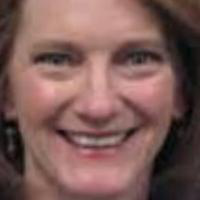

In [1]:
from IPython.display import Image

# Path to your PNG image file
image_path = 'face_age/043/1938.png'

# Display the image
Image(filename=image_path)

In [2]:
import cv2
import numpy as np

# Assuming you have your trained model as 'model' and the path to the image as 'image_path'

# Read and preprocess the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (200, 200))
image = np.reshape(image, (1, 200, 200, 1)) / 255.0

# Make the prediction
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions)

print("Predicted label:", predicted_label)



NameError: name 'model' is not defined